**Question 3**

Cell phones are becoming an integral part of our daily lives. Commissioned by Motorola, a new behavioral study took researchers to nine cities worldwide from New York to London. Using a combination of
personal interviews, field studies, and observation, the study identified a variety of behaviors that demonstrate the dramatic impact cell phones are having on the way people interact. The study found cell phones give people a newfound personal power, enabling unprecedented mobility and allowing them to conduct their business on the go. Interesting enough, gender differences can be found in phone use. Women see their cell phone as a means of expression and social communication, whereas males tend to use it as an interactive toy. A cell phone industry spokesman stated that half of all cell phones in use are registered to females.

- State the appropriate null and alternative hypotheses for testing the industry claim.
- Based on a random sample of cell phone owners shown in the data file called Cell Phone Survey, test the null hypothesis. (Use α = 0.05.)
- The study also wants to test which group gender spent money on their mobile phone. Conduct the statistical test at significance level 0.05. Discuss your finding.

**1. Summarize**

- Population parameter is the total count between male & female cell phone users
- Null Hypothesis: Total registered female cell phone users = 50% (claim)
- Alternative Hypothesis: Total registered female cell phone users ≠ 50%
- Based on the statement given, this is a two side or two tailed test
- Level of significance is 95%
- Alpha value is at 0.05

**2. Summarize**

- Population parameter is total spend between gender
- Null Hypothesis: Spend money on phone between men & women are equal (claim)
- Alternative Hypothesis: Spend money on phone between men & women are not equal 
- Based on the statement given, this is a two side or two tailed test
- Level of significance is 95%
- Alpha value is at 0.05

In [1]:
# import all relevant python libraries

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats

In [2]:
# checking the dataset

data = pd.read_excel("CellPhoneSurvey.xlsx")
print(data.head(5), "\n")
print(data.dtypes, "\n")
print(data.shape, "\n")
print(data.isnull().sum())

  Gender Address-City   Age      Make  Price Home/Business  \
0      F        Boise  35.0     Nokia  100.0          Home   
1      F        Boise  46.0     Nokia  100.0      Business   
2      F     Meridian  31.0  Ericsson   45.0          Home   
3      F        Boise  50.0     Nokia  100.0          Home   
4      F        Boise  19.0     Nokia  100.0          Home   

   Monthly plan price  Total $'s spent  
0                25.0            140.0  
1               100.0            130.0  
2                25.0             45.0  
3                50.0            100.0  
4                25.0            140.0   

Gender                 object
Address-City           object
Age                   float64
Make                   object
Price                 float64
Home/Business          object
Monthly plan price    float64
Total $'s spent       float64
dtype: object 

(51, 8) 

Gender                1
Address-City          1
Age                   1
Make                  1
Price            

In [3]:
print(data.tail(3),"\n")                        # before drop
data.drop(data.tail(1).index,inplace=True)      # drop the last row
print(data.tail(3),"\n")                        # check the dataset again
print(data.shape)                               # dataset contain 50 rows

   Gender Address-City   Age   Make  Price Home/Business  Monthly plan price  \
48      M        Boise  34.0  Nokia  200.0      Business                90.0   
49      M        Boise  36.0  Nokia  200.0      Business                90.0   
50    NaN          NaN   NaN    NaN    NaN           NaN                 NaN   

    Total $'s spent  
48           240.00  
49           240.00  
50           135.28   

   Gender Address-City   Age   Make  Price Home/Business  Monthly plan price  \
47      M         Kuna  29.0  Nokia  100.0          Home                50.0   
48      M        Boise  34.0  Nokia  200.0      Business                90.0   
49      M        Boise  36.0  Nokia  200.0      Business                90.0   

    Total $'s spent  
47            240.0  
48            240.0  
49            240.0   

(50, 8)


In [4]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,50.0,38.52,13.00,19.0,29.5,35.5,43.75,74.0
Price,50.0,109.40,57.76,45.0,60.0,100.0,122.50,250.0
Monthly plan price,50.0,43.30,29.63,20.0,25.0,25.0,50.00,150.0
Total $'s spent,50.0,135.28,63.88,45.0,92.5,130.0,155.00,280.0


In [5]:
# it was claimed that 50% cell phone users are female
# count the gender column

print("Frequency Distribution")
gender = data.Gender.value_counts()
print(gender, "\n")

print("Percentage Frequency Distribution")
percentages_freq = data.Gender.value_counts(normalize=True) * 100
print(percentages_freq)

Frequency Distribution
M    30
F    20
Name: Gender, dtype: int64 

Percentage Frequency Distribution
M    60.0
F    40.0
Name: Gender, dtype: float64


In [6]:
# perform non parametric proportion nominal data (binomial test)
# two tail test

print('HYPOTHESIS STATEMENT')
print('H_NULL: The proportion of female registered cell phone is = 50% (claim)')
print('H_ALT:The proportion of female registered cell phone is ≠ 50%', "\n")

mysum = sum(gender.values)                                          # sum the total gender, 50                      
myX = gender.values[1]                                              # select F, 20

cofidence_level=0.95                                                # specify the confidence level 
alpha=(1-cofidence_level)                                           # calculate alpha (significance level) 
print('Significance level, α=%.2f '%(alpha), "\n")

pvalue = stats.binom_test(myX,mysum,p=0.5,alternative='two-sided') # p=0.5 refering to proportion 50%, default test function is for 2 tail test
print('P Value: %.3f' %pvalue)

if pvalue < alpha: 
    print('The null hypothesis is rejected') 
    print('The proportion of female registered cell phone is ≠ 50%') 
else: 
    print('The null hypothesis is accepted') 
    print('The proportion of female registered cell phone is = 50% (claim)')

HYPOTHESIS STATEMENT
H_NULL: The proportion of female registered cell phone is = 50% (claim)
H_ALT:The proportion of female registered cell phone is ≠ 50% 

Significance level, α=0.05  

P Value: 0.203
The null hypothesis is accepted
The proportion of female registered cell phone is = 50% (claim)


**Hypothesis Testing**

Based on the observation, it is clear that female users are not equal or less than 50%. However, the p-value result shows differently & it is likely to be a Type II error. This is where the null hypothesis is not rejected when the alternative hypothesis is true.

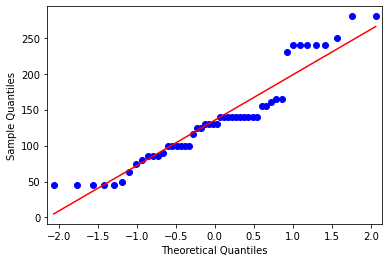

In [7]:
# the differences total spend based on gender
# checking total spend column
# perform visual normality test

qqplot(data["Total $'s spent"], line='s')
plt.show()

In [8]:
# perform numerical normality test
# using the Kolmogorov Smirnov Test

confidence_level = 0.95                         # specify the confidence level
alpha = (1-confidence_level)                    # calculate alpha 

price = data["Total $'s spent"]
loc, scale = stats.norm.fit(price) 
n = stats.norm(loc=loc, scale=scale)            # create a normal distribution with loc and s 

stats,pvalue=stats.kstest(price, n.cdf)         # return KS value and P-value
print('Hypothesis Statement')
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed', "\n")
print('Kolmogorov-Smirnov Statistics=%.3f, p_value=%.3f' % (stats, pvalue))

if pvalue < alpha:                              # 
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

Hypothesis Statement
H_null - Data is normally distributed
H_alt - Data is not normally distributed 

Kolmogorov-Smirnov Statistics=0.190, p_value=0.047
The null hypothesis is rejected
Data is NOT NORMALLY distributed


In [14]:
# proceed to conduct statistical testing using non parametric Median Test

print('HYPOTHESIS STATEMENT')
print('H_NULL: Spend money on phone between men & women are equal (claim)')
print("H_ALT: Spend money on phone between men & women are not equal" , "\n")

female_mps = list(data[data.Gender=='F']["Total $'s spent"])                    # the scipy.stats.ttest_ind function require array data
male_mps = list(data[data.Gender=='M']["Total $'s spent"])                      # pull array of mobile phone price based on gender

confidence_level = 0.95                                                         # specify the confidence level
alpha = (1-confidence_level)  
print('Significance level, α=%.2f '%(alpha), "\n")

stats,pvalue= scipy.stats.ttest_ind(a=female_mps, b=male_mps, equal_var=True)   # Median Test           
print('Ttest_indResult=%.3f, p_value=%.3f' % (stats, pvalue))

if(pvalue)<alpha:                                                               # decision on statistical test
    print('The null hypothesis is rejected as P-value is less than α ')
else:
    print('The null hypothesis is accepted as P-value is more than α')

HYPOTHESIS STATEMENT
H_NULL: Spend money on phone between men & women are equal (claim)
H_ALT: Spend money on phone between men & women are not equal 

Significance level, α=0.05  

Ttest_indResult=-2.158, p_value=0.036
The null hypothesis is rejected as P-value is less than α 


In [15]:
# Further checking the hypothesis

female_total = data[data.Gender=='F']["Total $'s spent"].sum()
male_total = data[data.Gender=='M']["Total $'s spent"].sum()

print("Total female spend:", female_total, "Total male spend:", male_total)

Total female spend: 2245.0 Total male spend: 4519.0


**Conclusion**

Population parameter is the mean of out-of-pocket prescription drug expenses. Based on the statement given, the hypothesis can be described as follow:

- Null Hypothesis: The total spend between men & women are equal (claim)
- Alternative Hypothesis: The total spend between men & women are not equal

This is a two side or two tailed test. Level of significance is 95% so alpha value will be at 0.05. Since the variable is more than 50 samples, Kolmogorov test was tested for normality checking. It was found that the data is not normally distributed with a p-value of 0.047. Next, the median test will be used to conduct the hypothesis testing as two samples are independent. The p-value is at 0.036 level of significance, the null hypothesis is rejected as p–value is less than alpha.


